In [1]:
import sys
import os

# Check the current working directory
current_working_directory = os.getcwd()
print("Current working directory:", current_working_directory)

# Construct the path to the parent directory (project directory)
project_dir = os.path.abspath(os.path.join(current_working_directory, '..'))

# Add the parent directory to the system path if it's not already there
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

# Print the updated sys.path for verification
print("Updated sys.path:", sys.path)

try:
    from src.config import import_test
    print("Module imported successfully")
    # Use the module as needed
    import_test
except ModuleNotFoundError as e:
    print("ModuleNotFoundError:", e)

Current working directory: /Users/manolis_skoufris/Documents/2024/Winter Research/PhysicsInformedMachineLearning-WinterResearchProject/test
Updated sys.path: ['/Users/manolis_skoufris/Documents/2024/Winter Research/PhysicsInformedMachineLearning-WinterResearchProject', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/manolis_skoufris/Documents/2024/Winter Research/PhysicsInformedMachineLearning-WinterResearchProject/env/lib/python3.12/site-packages']
Module imported successfully


In [2]:
from src.train import *

In [3]:
grid = Grid2D(0,1,0.01,0,1,0.01)
grid = grid.grid
points = grid[torch.logical_or(grid[...,0] == 0, grid[...,0] == 1)]
# print(points)
pinn = pinn1D()

# first_partial_derivative(pinn,points,0)[-1]
# boundary_loss(pinn,points,xero)
dirichlet_heat_equation_pde.pde(pinn,points).shape
len(points)

202

In [59]:
pinn = pinn1D()
grid = Grid2D(0,1,0.01,0,1,0.01)
torch.manual_seed(1)
losses, epoch_losses = train(pinn, dirichlet_heat_equation_pde, grid, nepochs=1000, lr=0.001)

100%|███████████████████████████████████████████████████████| 1000/1000 [01:13<00:00, 13.68it/s, loss=0.00009]


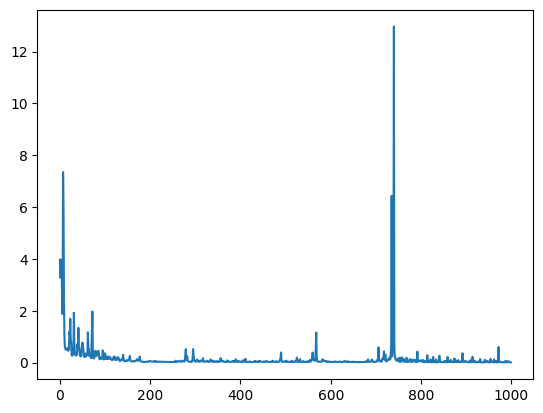

In [60]:
plt.plot(losses)

## Visualisation

tensor(0.0036, grad_fn=<MseLossBackward0>)

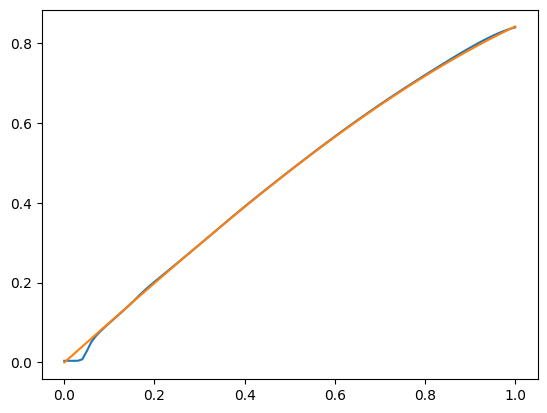

In [62]:
grid = Grid2D(0,1,0.01,0,1,0.01).grid
import numpy as np 

points = grid[grid[...,1] ==  0]
x = points[...,0]
t = points[...,1]

plt.plot(x.detach().numpy(), pinn(x,t).detach().numpy())
plt.plot(x.detach().numpy(), np.sin(x.detach().numpy()))

mse_loss(x,pinn(x,t))